In [6]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None

In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
url='https://raw.githubusercontent.com/nikipi/big_data_policy_2020/master/data/beers.csv'
# read some data
beer = pd.read_csv(url)
print(beer.shape)

(225, 5)


In [20]:
beer.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


In [21]:
beer.isnull().sum()

alcohol_content    0
bitterness         0
darkness           0
fruitiness         0
is_yummy           0
dtype: int64

In [22]:
beer.describe()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,4.711873,0.463945,2.574963,0.223111,0.528889
std,0.437040,0.227366,1.725916,0.117272,0.500278
min,3.073993,0.000000,0.000000,0.000000,0.000000
25%,4.429183,0.281291,1.197640,0.135783,0.000000
50%,4.740846,0.488249,2.026548,0.242396,1.000000
75%,5.005170,0.631056,4.043995,0.311874,1.000000
max,5.955272,1.080170,7.221285,0.535315,1.000000


## EDA

In [23]:
def translate_label(value):
    return "no" if value==0 else 'yes'

for_plot=beer.copy()

for_plot['is_yummy']=for_plot['is_yummy'].apply(translate_label)

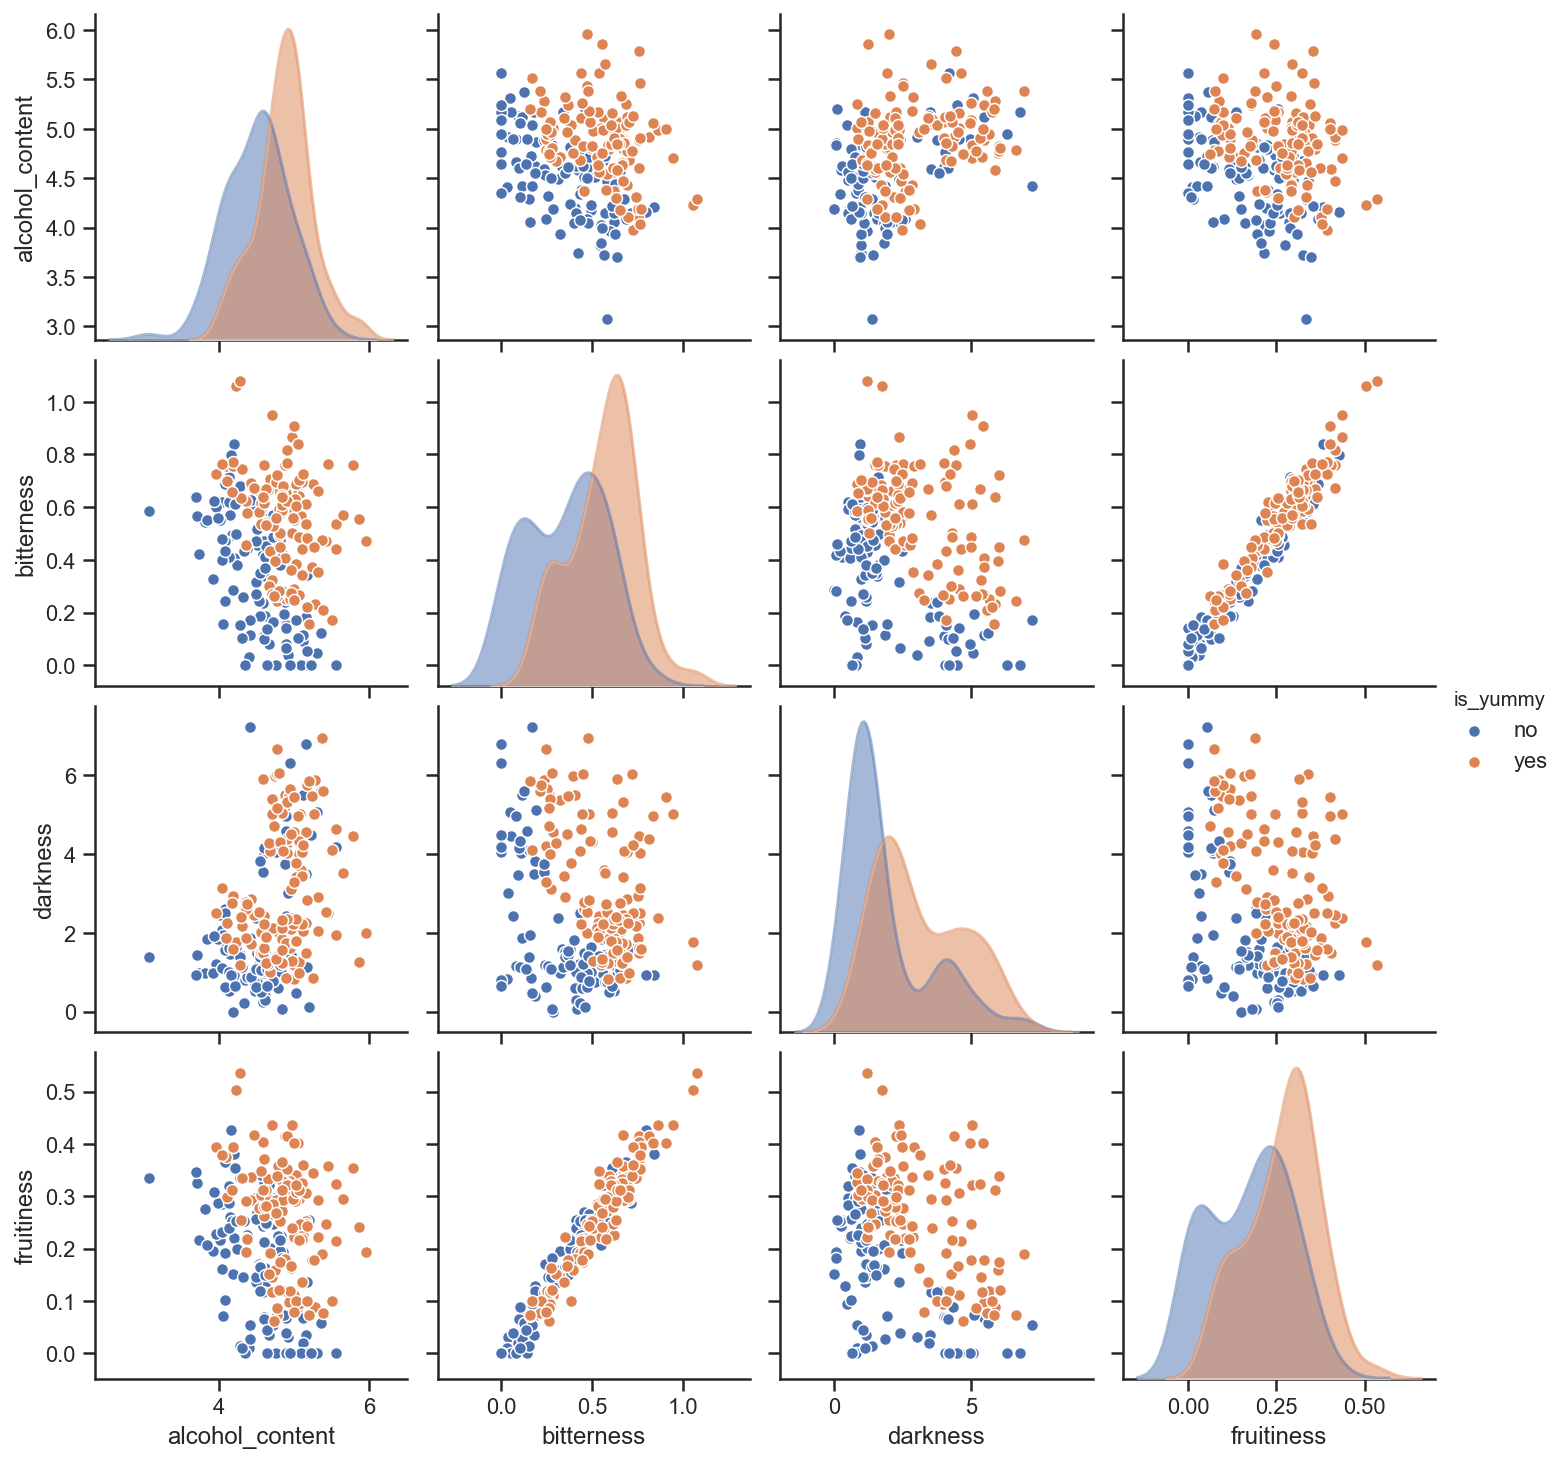

In [25]:
import seaborn as sns
sns.set(style='ticks')

sns.pairplot(for_plot, hue='is_yummy',diag_kws = dict(alpha=.5))

# diag_kind='hist'  choose from hist and kde

# use hue to find the distribution from "is_yummy"  roughly find the useful attributes

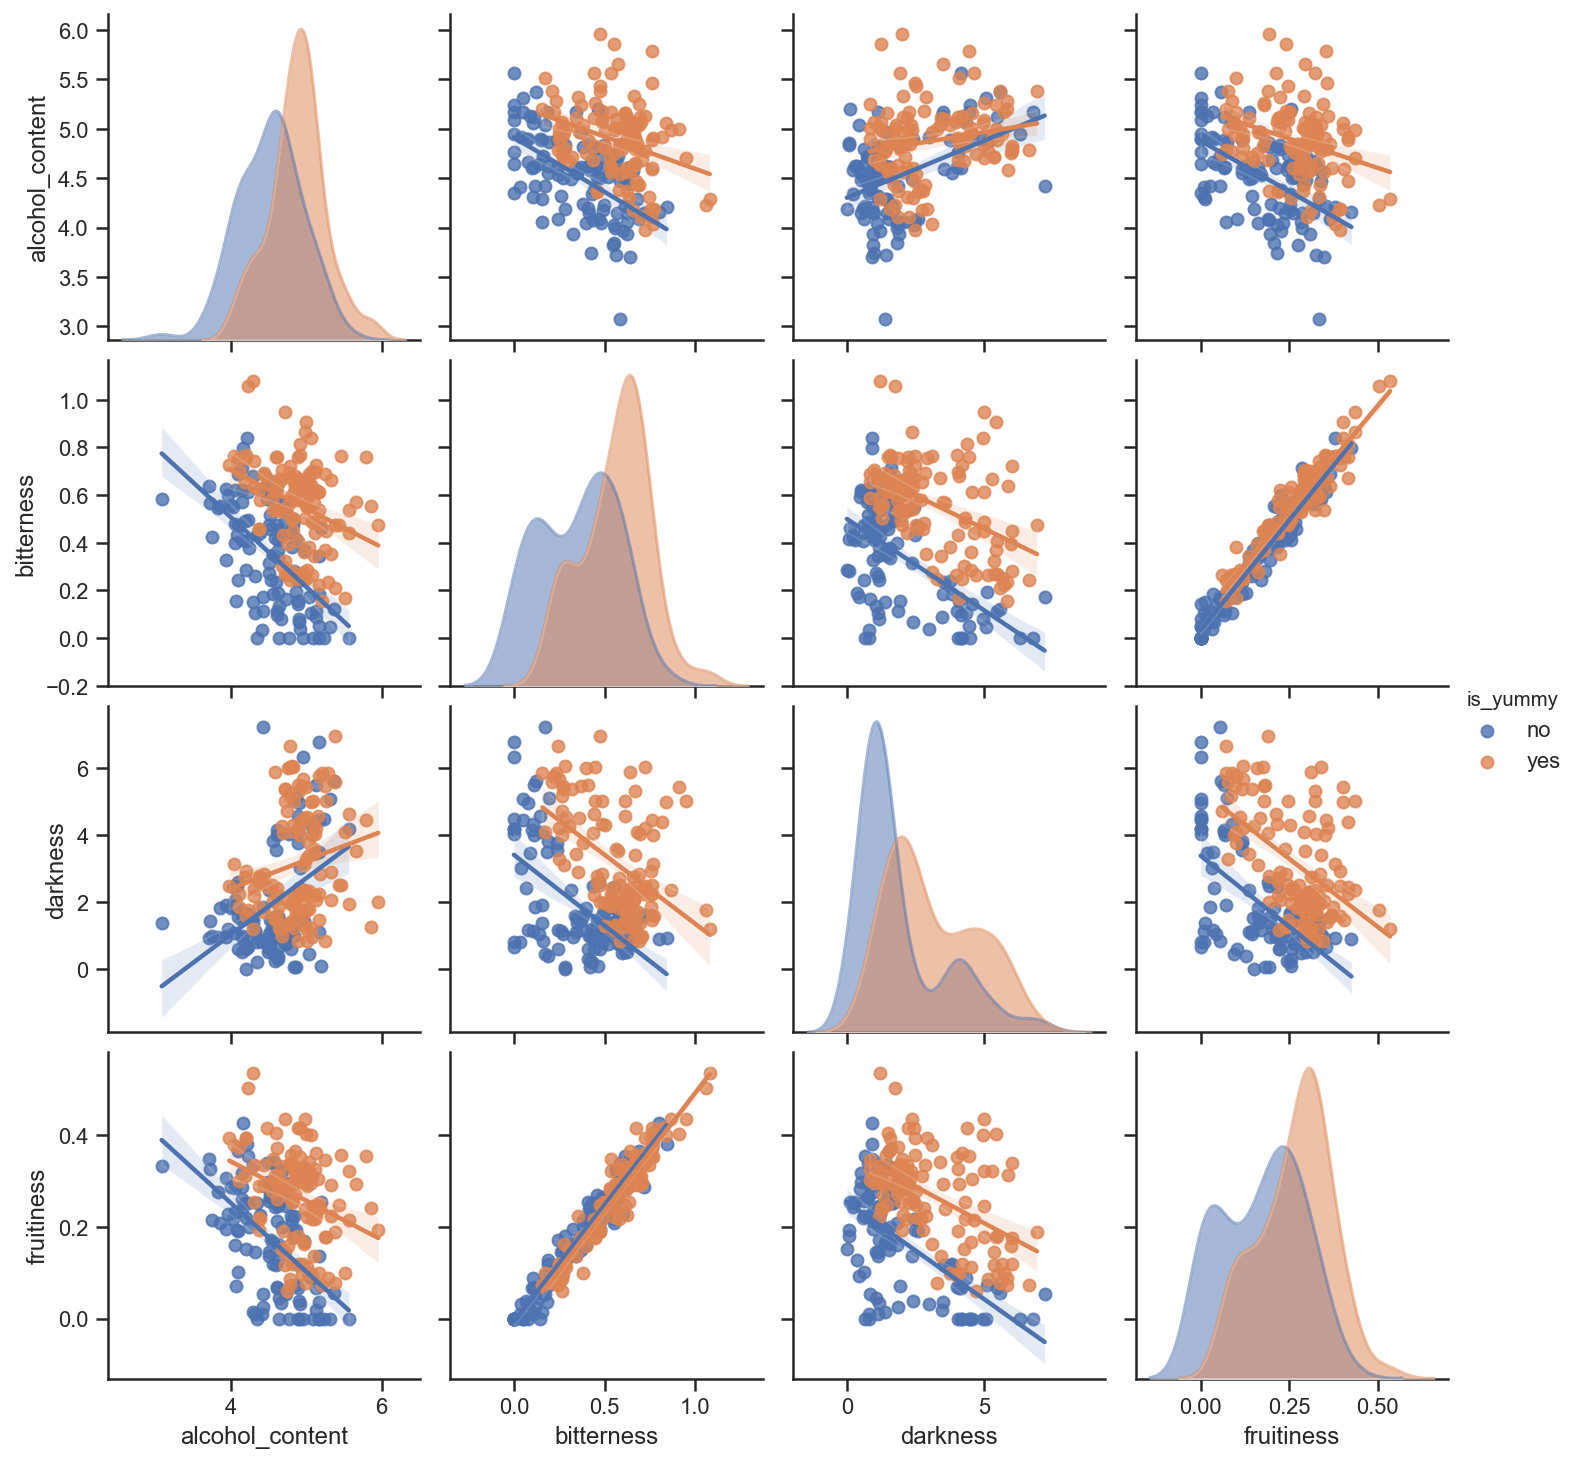

In [26]:

sns.pairplot(for_plot, hue='is_yummy',diag_kws = dict(alpha=.5),kind='reg')

## Split test and train 

In [27]:
X= beer.iloc[:,:-1]
y=beer.iloc[:,-1]

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Fit
classifier.fit(X, y)

# scores
y_scores = classifier.fit(X, y).decision_function(X)

# Predict
y_pred = classifier.predict(X)

In [30]:
print(len(y), "examples")
print(sum(y_pred == y), "labeled correctly")

225 examples
187 labeled correctly


In [31]:
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score)

In [32]:
# using the results of the simple classifier of part 1
print(confusion_matrix(y, y_pred))

# The first argument of the metrics functions is the exact labels, 
# the second argument is the predictions:

print("{:20s} {:.3f}".format("precision", precision_score(y, y_pred)))
print("{:20s} {:.3f}".format("recall", recall_score(y, y_pred)))
print("{:20s} {:.3f}".format("f1", f1_score(y, y_pred)))
print("{:20s} {:.3f}".format("accuracy", accuracy_score(y, y_pred)))
print("{:20s} {:.3f}".format("auc", roc_auc_score(y, y_scores)))

[[ 80  26]
 [ 12 107]]
precision            0.805
recall               0.899
f1                   0.849
accuracy             0.831
auc                  0.913
